In [278]:
import pandas as pd

def clean_data(df):
    # Filter rows based on column: 'Code du département'
    df = df[(df['Code du département'] == "27") | (df['Code du département'] == "76") | (df['Code du département'] == "61") | (df['Code du département'] == "50") | (df['Code du département'] == "14")]
    return df

# Loaded variable 'df' from URI: /Users/newuser/data/elections/raw/candidats_results.parquet
df = pd.read_parquet(r'/Users/newuser/data/elections/raw/candidats_results.parquet')

df_clean = clean_data(df.copy())
df_clean.head()


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
7759,2019_euro_t1,14001_0001,14,001,0001,1.0,LA FRANCE INSOUMISE,LA FRANCE INSOUMISE,AUBRY Manon,28.0,2.94,5.30,None,None,None,None,None,None
7760,2019_euro_t1,14003_0001,14,003,0001,1.0,LA FRANCE INSOUMISE,LA FRANCE INSOUMISE,AUBRY Manon,10.0,4.46,7.58,None,None,None,None,None,None
7761,2019_euro_t1,14005_0001,14,005,0001,1.0,LA FRANCE INSOUMISE,LA FRANCE INSOUMISE,AUBRY Manon,21.0,4.16,7.39,None,None,None,None,None,None
7762,2019_euro_t1,14005_0002,14,005,0002,1.0,LA FRANCE INSOUMISE,LA FRANCE INSOUMISE,AUBRY Manon,12.0,4.62,8.45,None,None,None,None,None,None
7763,2019_euro_t1,14005_0003,14,005,0003,1.0,LA FRANCE INSOUMISE,LA FRANCE INSOUMISE,AUBRY Manon,1.0,1.54,3.45,None,None,None,None,None,None


Maintenant on filtre le dataset pour se limiter aux élections depuis 2022

In [282]:
def clean_data_since_2019(df):
    # filter rows based on column id_election
    df = df[(df['id_election'] == "2019_euro_t1") | (df['id_election'] == "2022_pres_t1") | (df['id_election'] == "2022_pres_t2") | (df['id_election'] == "2022_legi_t1") | (df['id_election'] == "2022_legi_t2") | (df['id_election'] == "2024_euro_t1")]
    return df

df_clean2019 = clean_data_since_2019(df_clean.copy())
df_clean2019.head()


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
7759,2019_euro_t1,14001_0001,14,001,0001,1.0,LA FRANCE INSOUMISE,LA FRANCE INSOUMISE,AUBRY Manon,28.0,2.94,5.30,None,None,None,None,None,None
7760,2019_euro_t1,14003_0001,14,003,0001,1.0,LA FRANCE INSOUMISE,LA FRANCE INSOUMISE,AUBRY Manon,10.0,4.46,7.58,None,None,None,None,None,None
7761,2019_euro_t1,14005_0001,14,005,0001,1.0,LA FRANCE INSOUMISE,LA FRANCE INSOUMISE,AUBRY Manon,21.0,4.16,7.39,None,None,None,None,None,None
7762,2019_euro_t1,14005_0002,14,005,0002,1.0,LA FRANCE INSOUMISE,LA FRANCE INSOUMISE,AUBRY Manon,12.0,4.62,8.45,None,None,None,None,None,None
7763,2019_euro_t1,14005_0003,14,005,0003,1.0,LA FRANCE INSOUMISE,LA FRANCE INSOUMISE,AUBRY Manon,1.0,1.54,3.45,None,None,None,None,None,None


On est passé de 45 secondes de processing à 1s. ça fait du bien. 

In [56]:
df_clean2019.keys()

Index(['id_election', 'id_brut_miom', 'Code du département',
       'Code de la commune', 'Code du b.vote', 'N°Panneau',
       'Libellé Abrégé Liste', 'Libellé Etendu Liste', 'Nom Tête de Liste',
       'Voix', '% Voix/Ins', '% Voix/Exp', 'Sexe', 'Nom', 'Prénom', 'Nuance',
       'Binôme', 'Liste'],
      dtype='object')

In [57]:
print((df_clean2019.dtypes.to_dict()))
#print(list(df_clean2022.dtypes))

{'id_election': dtype('O'), 'id_brut_miom': dtype('O'), 'Code du département': dtype('O'), 'Code de la commune': dtype('O'), 'Code du b.vote': dtype('O'), 'N°Panneau': dtype('float64'), 'Libellé Abrégé Liste': dtype('O'), 'Libellé Etendu Liste': dtype('O'), 'Nom Tête de Liste': dtype('O'), 'Voix': dtype('float64'), '% Voix/Ins': dtype('float32'), '% Voix/Exp': dtype('float32'), 'Sexe': dtype('O'), 'Nom': dtype('O'), 'Prénom': dtype('O'), 'Nuance': dtype('O'), 'Binôme': dtype('O'), 'Liste': dtype('O')}


On sauvegarde le fichier resultats

In [58]:
df_clean2019.to_parquet('~/data/elections/eda/2019to2024Europeennes_results_normandie_skim_simple.parquet')

Maintenant on ouvre le parquet general_results (pour aller chercher la participation)

In [59]:
dfc = pd.read_parquet(r'/Users/newuser/data/elections/raw/general_results.parquet')
dfc_clean = clean_data(dfc.copy())
dfc_clean2019 = clean_data_since_2019(dfc_clean.copy())
dfc_clean2019.head()

,id_election,id_brut_miom,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,...,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot,Code de la circonscription,Libellé de la circonscription,Code du canton,Libellé du canton
7759,2019_euro_t1,14001_0001,14,Calvados,001,Ablon,0001,952,405,42.540001,...,7,0.74,1.28,528,55.459999,96.529999,None,None,None,None
7760,2019_euro_t1,14003_0001,14,Calvados,003,Agy,0001,224,88,39.290001,...,4,1.79,2.94,132,58.930000,97.059998,None,None,None,None
7761,2019_euro_t1,14005_0001,14,Calvados,005,Valambray,0001,505,203,40.200001,...,16,3.17,5.30,284,56.240002,94.040001,None,None,None,None
7762,2019_euro_t1,14005_0002,14,Calvados,005,Valambray,0002,260,112,43.080002,...,4,1.54,2.70,142,54.619999,95.949997,None,None,None,None
7763,2019_euro_t1,14005_0003,14,Calvados,005,Valambray,0003,65,34,52.310001,...,2,3.08,6.45,29,44.619999,93.550003,None,None,None,None


In [60]:
print(dfc_clean2019.dtypes)

id_election                       object
id_brut_miom                      object
Code du département               object
Libellé du département            object
Code de la commune                object
Libellé de la commune             object
Code du b.vote                    object
Inscrits                           int32
Abstentions                        int32
% Abs/Ins                        float32
Votants                            int32
% Vot/Ins                        float32
Blancs                           float64
% Blancs/Ins                     float32
% Blancs/Vot                     float32
Nuls                               int32
% Nuls/Ins                       float32
% Nuls/Vot                       float32
Exprimés                           int32
% Exp/Ins                        float32
% Exp/Vot                        float32
Code de la circonscription        object
Libellé de la circonscription     object
Code du canton                    object
Libellé du canto

On sauvegarde maintenant ce fichier

In [61]:
dfc_clean2019.to_parquet('~/data/elections/eda/2019to2024Europeennes_participation_normandie_skim_simple.parquet')

Meme démarche pour les datasets législatives 2024 - t1 et t2, et candidats t1 et t2 si nécessaire

In [62]:
#2024 t1 resultats
df1 = pd.read_csv(r'/Users/newuser/data/elections/raw/legislatives2024_t1_resultats-definitifs-par-bureau-de-vote.csv',sep=';',decimal=",")

#2024 t2 resultats
df2 = pd.read_csv(r'/Users/newuser/data/elections/raw/legislatives2024_t2_resultats-definitifs-par-bureau-de-vote.csv',sep=';',decimal=",")

#2024 t1 candidats
df1c = pd.read_csv(r'/Users/newuser/data/elections/raw/legislatives-2024-candidatures-france-entiere-tour-1-2024-06-28.csv',sep=';',decimal=",")

#2024 t2 candidats
df2c = pd.read_csv(r'/Users/newuser/data/elections/raw/legislatives-2024-candidatures-france-entiere-tour-2-2024-07-05.csv',sep=';',decimal=",")

#
# on récupère le nom des variables d'abord
def get_variables_dict (df):
    return df.dtypes.to_dict()

#dictionnaires resultats
dict_2024_leg1_clean = get_variables_dict(df1.copy())
print ("Printing dict 1 ","\n",dict_2024_leg1_clean)
dict_2024_leg2_clean = get_variables_dict(df2.copy())
print ("Printing dict 2 ","\n",dict_2024_leg2_clean)

#dictionnaire candidats
dict_2024_leg1c_clean = get_variables_dict(df1c.copy())
print ("Printing dict candidats 1 ","\n",dict_2024_leg1c_clean)
dict_2024_leg2c_clean = get_variables_dict(df2c.copy())
print ("Printing dict candidats 2 ","\n",dict_2024_leg2c_clean)
#df_2024_leg1_clean = clean_data(df.copy())
#df_2024_leg1_clean.head()

/var/folders/gq/3q67kslj5_lb13yn9xswy0740000gn/T/ipykernel_1110/2129404055.py:2: DtypeWarning: Columns (0,2,4,27,36,45,54,63,72,81,90,92,93,94,95,97,98,101,102,103,104,106,107,108,110,111,112,113,115,116,117,119,120,121,122,124,125,128,129,130,131,133,134,137,138,139,140,142,143,146,147,148,149,151,152,155,156,157,158,160,161,164,165,166,167,169,170,173,174,175,176,178,179,182,183,184,185,187,188) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r'/Users/newuser/data/elections/raw/legislatives2024_t1_resultats-definitifs-par-bureau-de-vote.csv',sep=';',decimal=",")
/var/folders/gq/3q67kslj5_lb13yn9xswy0740000gn/T/ipykernel_1110/2129404055.py:5: DtypeWarning: Columns (0,2,47,48,49,50,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(r'/Users/newuser/data/elections/raw/legislatives2024_t2_resultats-definitifs-par-bureau-de-vote.csv',sep=';',decimal=",")


Printing dict 1  
 {'Code département': dtype('O'), 'Libellé département': dtype('O'), 'Code commune': dtype('O'), 'Libellé commune': dtype('O'), 'Code BV': dtype('O'), 'Inscrits': dtype('int64'), 'Votants': dtype('int64'), '% Votants': dtype('O'), 'Abstentions': dtype('int64'), '% Abstentions': dtype('O'), 'Exprimés': dtype('int64'), '% Exprimés/inscrits': dtype('O'), '% Exprimés/votants': dtype('O'), 'Blancs': dtype('int64'), '% Blancs/inscrits': dtype('O'), '% Blancs/votants': dtype('O'), 'Nuls': dtype('int64'), '% Nuls/inscrits': dtype('O'), '% Nuls/votants': dtype('O'), 'Numéro de panneau 1': dtype('int64'), 'Nuance candidat 1': dtype('O'), 'Nom candidat 1': dtype('O'), 'Prénom candidat 1': dtype('O'), 'Sexe candidat 1': dtype('O'), 'Voix 1': dtype('int64'), '% Voix/inscrits 1': dtype('O'), '% Voix/exprimés 1': dtype('O'), 'Elu 1': dtype('O'), 'Numéro de panneau 2': dtype('int64'), 'Nuance candidat 2': dtype('O'), 'Nom candidat 2': dtype('O'), 'Prénom candidat 2': dtype('O'), 'Sex

la fonction définie au debut pour cleaner les data n'a pas prévu que le nom de la colonne département soit nommée différemment. On étend la définition pour prendre ceci en compte.

In [85]:
def clean_data_departements_normands(df,v):
    # Filter rows based on column: 'Code du département'
    df = df[(df[v] == "27") | (df[v] == "76") | (df[v] == "61") | (df[v] == "50") | (df[v] == "14")
            |
            (df[v] == 27) | (df[v] == 76) | (df[v] == 61) | (df[v] == 50) | (df[v] == 14)]
    return df

def clean_data_candidats_normands(df,v):
    # Filter rows based on column: 'Code du département'
    df = df[(df[v] == "27") | (df[v] == "76") | (df[v] == "61") | (df[v] == "50") | (df[v] == "14")]
    return df

df_2024_leg1_clean = clean_data_departements_normands(df1.copy(),"Code département")
df_2024_leg1c_clean = clean_data_candidats_normands(df1c.copy(),"Code département")
df_2024_leg2_clean = clean_data_departements_normands(df2.copy(),"Code département")
df_2024_leg2c_clean = clean_data_candidats_normands(df2c.copy(),"Code département")
#print(df_2024_leg1_clean[df_2024_leg1_clean['Code département'] == 27])
print(df_2024_leg2_clean[df_2024_leg2_clean['Code département'] == "27"])

      Code département Libellé département Code commune Libellé commune  \
13206               27                Eure        27001           Aclou   
13207               27                Eure        27002            Acon   
13208               27                Eure        27003        Acquigny   
13209               27                Eure        27003        Acquigny   
13210               27                Eure        27004      Aigleville   
...                ...                 ...          ...             ...   
14009               27                Eure        27701    Val-de-Reuil   
14010               27                Eure        27701    Val-de-Reuil   
14011               27                Eure        27701    Val-de-Reuil   
14012               27                Eure        27701    Val-de-Reuil   
14013               27                Eure        27701    Val-de-Reuil   

      Code BV  Inscrits  Votants % Votants  Abstentions % Abstentions  ...  \
13206    0001       2

CHECK DES DATASETS

In [86]:
print(df_2024_leg2_clean[['Code BV','Code commune']].head())
print(df_2024_leg2_clean[['Code BV','Code commune']].tail())

     Code BV Code commune
5981    0001        14001
5982    0001        14003
5983    0001        14005
5984    0002        14005
5985    0003        14005
      Code BV Code commune
48234    0006        76758
48235    0007        76758
48236    0008        76758
48237    0009        76758
48238    0001        76759



##### PROBLEME APPARENT QUAND JE CHERCHE A SAUVEGARDER EN PARQUET...
##### Merci le ministere de l'intérieur !
```ArrowTypeError: ("Expected bytes, got a 'int' object", 'Conversion failed for column Code BV with type object')```
##### La solution se trouve peut etre dans .astype('str'), mais ça m'amène à printer le datatype de chaque colonne (et vérifier que c'est pas mixed...)


In [87]:
pd.api.types.infer_dtype(df_2024_leg1_clean['Code BV'])

'mixed-integer'

In [107]:
print("Check data types L1")
for column in df_2024_leg1_clean.columns:
    print(df_2024_leg1_clean[column].name, "type :",pd.api.types.infer_dtype(df_2024_leg1_clean[column]))


print("\n\n Check data types L2 \n\n")
for column in df_2024_leg2_clean.columns:
    print(df_2024_leg2_clean[column].name, "type :",pd.api.types.infer_dtype(df_2024_leg2_clean[column])) 

#Code département type : mixed-integer
#Code commune type : mixed-integer

df_2024_leg2_clean['Code département'][df_2024_leg2_clean['Code département'].apply(lambda x: isinstance(x, str))]
df_2024_leg2_clean['Code commune'][df_2024_leg2_clean['Code commune'].apply(lambda x: isinstance(x, int))]

# Après correction mixed types:

# Fonction de normalisation
def normalize_string(s):
    # Convertit en chaîne de caractères et supprime les zéros en début de chaîne
    return str(s)

def normalize_int(s):
    # Convertit en chaîne de caractères et supprime les zéros en début de chaîne
    return int(s)
# Application de la normalisation aux colonnes
df_2024_leg2_clean['Code département'] = df_2024_leg2_clean['Code département'].apply(normalize_string)
df_2024_leg2_clean['Code commune'] = df_2024_leg2_clean['Code commune'].apply(normalize_int)

print('\n')
for column in df_2024_leg2_clean.columns: 
    print(df_2024_leg2_clean[column].name, "type :",pd.api.types.infer_dtype(df_2024_leg2_clean[column])) 



Check data types L1
Code département type : integer
Libellé département type : string
Code commune type : integer
Libellé commune type : string
Code BV type : string
Inscrits type : integer
Votants type : integer
% Votants type : string
Abstentions type : integer
% Abstentions type : string
Exprimés type : integer
% Exprimés/inscrits type : string
% Exprimés/votants type : string
Blancs type : integer
% Blancs/inscrits type : string
% Blancs/votants type : string
Nuls type : integer
% Nuls/inscrits type : string
% Nuls/votants type : string
Numéro de panneau 1 type : integer
Nuance candidat 1 type : string
Nom candidat 1 type : string
Prénom candidat 1 type : string
Sexe candidat 1 type : string
Voix 1 type : integer
% Voix/inscrits 1 type : string
% Voix/exprimés 1 type : string
Elu 1 type : empty
Numéro de panneau 2 type : integer
Nuance candidat 2 type : string
Nom candidat 2 type : string
Prénom candidat 2 type : string
Sexe candidat 2 type : string
Voix 2 type : integer
% Voix/ins

In [108]:
#df_2024_leg1_clean['Code BV'].head()
#df_2024_leg1_clean['Code BV'] = df_2024_leg1_clean['Code BV'].astype('str')
#df_2024_leg2_clean['Code BV'].head()
#df_2024_leg2_clean['Code BV'] = df_2024_leg2_clean['Code BV'].astype('str')
#print(df_2024_leg1_clean['Code BV'].dtype)
#df1c.head()
#df_2024_leg1c_clean.tail()
#print((df_2024_leg1_clean.dtypes.to_dict()))
df_2024_leg1_clean.to_parquet('~/data/elections/eda/2024Legislatives_t1_results_normandie_skim_simple.parquet')
df_2024_leg1c_clean.to_parquet('~/data/elections/eda/2024Legislatives_t1_candidats_normandie_skim_simple.parquet')
df_2024_leg2_clean.to_parquet('~/data/elections/eda/2024Legislatives_t2_results_normandie_skim_simple.parquet')
df_2024_leg2c_clean.to_parquet('~/data/elections/eda/2024Legislatives_t2_candidats_normandie_skim_simple.parquet')

#### Etape intermédiaire avant de skim pour de vrai 
##### on va chercher les dicts et les sauver de coté...

In [109]:
import pandas as pd

df= pd.read_parquet('~/data/elections/eda/2019to2024Europeennes_results_normandie_skim_simple.parquet')
df.dtypes.to_dict()


{'id_election': dtype('O'),
 'id_brut_miom': dtype('O'),
 'Code du département': dtype('O'),
 'Code de la commune': dtype('O'),
 'Code du b.vote': dtype('O'),
 'N°Panneau': dtype('float64'),
 'Libellé Abrégé Liste': dtype('O'),
 'Libellé Etendu Liste': dtype('O'),
 'Nom Tête de Liste': dtype('O'),
 'Voix': dtype('float64'),
 '% Voix/Ins': dtype('float32'),
 '% Voix/Exp': dtype('float32'),
 'Sexe': dtype('O'),
 'Nom': dtype('O'),
 'Prénom': dtype('O'),
 'Nuance': dtype('O'),
 'Binôme': dtype('O'),
 'Liste': dtype('O')}

Voili voilou. Maintenant on peut passer au vrai SKIM

# Données Vernonnaises
## Skim des données
### Objectif: 
Sortir de ce bout de code avec un dataframe pour chaque election. Le dataframe contiendra les taux de participation grace à un join.
Pour 2024-legi, on devra procéder légèrement différemment, les structures de données n'étant pas exactement les mêmes que dans le dataset aggrégé.

In [268]:
import pandas as pd

#données aggrégées par le ministère
df_results = pd.read_parquet('~/data/elections/eda/2019to2024Europeennes_results_normandie_skim_simple.parquet')
df_part =  pd.read_parquet('~/data/elections/eda/2019to2024Europeennes_participation_normandie_skim_simple.parquet')

# le libellé de commune est dans le dataset participation. cet méthode parmet de filtrer sur une commune 
def get_dataset_Commune (df1, k1, v1):
    df1 = df1[(df1[k1] == v1)] 
    return df1

df1 = get_dataset_Commune(df_part.copy(),"Libellé de la commune","Vernon")
# Sélectionner le sous-ensemble de colonnes dans chaque DataFrame
colonnes_interessantes_df1 = [
    'id_election', 'id_brut_miom', 'Code du département', 'Libellé du département',
    'Code de la commune', 'Libellé de la commune', 'Code du b.vote', 'Inscrits',
    'Abstentions', 'Nuls','Exprimés',
    'Code de la circonscription', 'Libellé de la circonscription']
colonnes_interessantes_df_results= [
    'id_election', 'id_brut_miom', 'Code du département', 'Code de la commune',
    'Code du b.vote',  'Libellé Abrégé Liste', 
    'Nom Tête de Liste', 'Voix', 'Nom', 'Prénom',
    'Nuance', 'Binôme']
CI_2019 = [
    'id_election','Libellé de la commune','Code du département_df1','Code du b.vote_df1', 
    'Inscrits','Abstentions','Nuls','Exprimés','Voix','Libellé Abrégé Liste','Nom Tête de Liste']
CI_2024 = CI_2019 + ['Nuance']
CI_2019 = [
    'id_election','Libellé de la commune','Code du département_df1','Code du b.vote_df1', 
    'Inscrits','Abstentions','Nuls','Exprimés','Voix','Libellé Abrégé Liste','Nom Tête de Liste']
CI_2024 = CI_2019 + ['Nuance']
CI_2022_p1 = [
    'id_election','Libellé de la commune','Code du département_df1','Code de la circonscription','Code du b.vote_df1', 
    'Inscrits','Abstentions','Nuls','Exprimés','Voix','Nom','Prénom']
CI_2022_l1 = [
    'id_election','Libellé de la commune','Code du département_df1','Code de la circonscription','Code du b.vote_df1', 
    'Inscrits','Abstentions','Nuls','Exprimés','Voix','Nom','Prénom','Nuance']

df1_subset = df1[colonnes_interessantes_df1]
df2_subset = df_results[colonnes_interessantes_df_results]
# Joindre les deux DataFrames sur 'id_brut_miom'
df_combined = pd.merge(df1_subset, df2_subset, on=('id_election','id_brut_miom'), how='left', suffixes=('_df1', '_df2'))

df_2019 = df_combined[df_combined['id_election']=="2019_euro_t1"]
df_2022_p1 = df_combined[df_combined['id_election']=="2022_pres_t1"]
df_2022_p2 = df_combined[df_combined['id_election']=="2022_pres_t2"]
df_2022_l1 = df_combined[df_combined['id_election']=="2022_legi_t1"] 
df_2022_l2 = df_combined[df_combined['id_election']=="2022_legi_t2"]
df_2024_e =  df_combined[df_combined['id_election']=="2024_euro_t1"]

#colonnes intéressantes issues du dataset combiné

df_2019_subset = df_2019[CI_2019]
df_2024_e_subset = df_2024_e[CI_2024]
df_2022_p1_subset = df_2022_p1[CI_2022_p1]
df_2022_p2_subset = df_2022_p2[CI_2022_p1] # meme subset de colonnes pour les deux tours de l'election presidentielle
df_2022_l1_subset = df_2022_l1[CI_2022_l1]
df_2022_l2_subset = df_2022_l2[CI_2022_l1]


#######################################
### ELECTION LEGISLATIVE ANTICIPEE 2024
# liste des datasets
df_2024_l1_candidats = pd.read_parquet('~/data/elections/eda/2024Legislatives_t1_candidats_normandie_skim_simple.parquet')
df_2024_l1_results = pd.read_parquet('~/data/elections/eda/2024Legislatives_t1_results_normandie_skim_simple.parquet')
df_2024_l2_candidats = pd.read_parquet('~/data/elections/eda/2024Legislatives_t2_candidats_normandie_skim_simple.parquet')
df_2024_l2_results = pd.read_parquet('~/data/elections/eda/2024Legislatives_t2_results_normandie_skim_simple.parquet')
# 1er tour : filtrage par commune
df_2024_l1_commune = get_dataset_Commune(df_2024_l1_results.copy(),"Libellé commune","Vernon")
df_2024_l2_commune = get_dataset_Commune(df_2024_l2_results.copy(),"Libellé commune","Vernon")
# Colonnes intéressantes des datasets resultats pour enlever les colonnes vides et les colonnes qui ne nous intéressent pas
CI_2024_legi = [
   'Code département','Libellé département','Code commune','Libellé commune','Code BV',
   'Inscrits','Votants','Abstentions','Exprimés','Blancs','Nuls',
   'Numéro de panneau 1','Nuance candidat 1','Nom candidat 1','Prénom candidat 1','Voix 1','Elu 1',
   'Numéro de panneau 2','Nuance candidat 2','Nom candidat 2','Prénom candidat 2','Voix 2','Elu 2',
   'Numéro de panneau 3','Nuance candidat 3','Nom candidat 3','Prénom candidat 3','Voix 3','Elu 3',
   'Numéro de panneau 4','Nuance candidat 4','Nom candidat 4','Prénom candidat 4','Voix 4','Elu 4',
   'Numéro de panneau 5','Nuance candidat 5','Nom candidat 5','Prénom candidat 5','Voix 5','Elu 5',
   'Numéro de panneau 6','Nuance candidat 6','Nom candidat 6','Prénom candidat 6','Voix 6','Elu 6',
   'Numéro de panneau 7','Nuance candidat 7','Nom candidat 7','Prénom candidat 7','Voix 7','Elu 7',
   'Numéro de panneau 8','Nuance candidat 8','Nom candidat 8','Prénom candidat 8','Voix 8','Elu 8',
   'Numéro de panneau 9','Nuance candidat 9','Nom candidat 9','Prénom candidat 9','Voix 9','Elu 9',
   'Numéro de panneau 10','Nuance candidat 10','Nom candidat 10','Prénom candidat 10','Voix 10','Elu 10'
]
df_2024_l1_subset = df_2024_l1_commune[CI_2024_legi]
# Comment adosser le numero de circo à ce dataset ?
# Dans 2022_legi1, il y a le code circo avec le Libellé commune. On peut donc faire une lookup table Commune -> Code Circo
# Problème, certaines communes sont à cheval sur deux circos !
# il faut donc combiner Libellé de la commune, Code de circonscription, et id_brut_miom (et code du BV tant qu'a faire, des fois que miom et BV n'ont pas la meme nomenclature...)
def get_circo_commune (df):
    df1 = df[(df['id_election'] == '2022_legi_t1')]
    df1 = df1[['Libellé de la commune','Code de la circonscription','id_brut_miom','Code du b.vote']]
    return df1 

df_circo_lut = get_circo_commune(df_part.copy())
df_circo_communes = get_dataset_Commune(df_circo_lut.copy(),"Libellé de la commune","Vernon")

df_circo_communes.rename(columns={
    'Code du b.vote': 'Code BV',
    'Libellé de la commune': 'Libellé commune'
    }, inplace=True)

#Quand on printe le Code BV, on se rend compte que les chains de charactères peuvent parfois être confondues à cause d'un zéro en queue. 
#On crée donc une méthode qui retire les zéros inutile en bout de chaine de caractères.
def normalize_string(s):
    # Supprime les zéros en début de chaîne
    return str(s).lstrip('0')

# Normalisation des colonnes
df_circo_communes['Code BV'] = df_circo_communes['Code BV'].apply(normalize_string)
df_circo_communes['Code de la circonscription'] = df_circo_communes['Code de la circonscription'].apply(normalize_string)

# Fusionner les deux DataFrames sur les colonnes spécifiées : obtenir le df combined 2024_legi_t1.
df_combined_2024_l1 = pd.merge(df_circo_communes, df_2024_l1_subset,how='inner',on=('Code BV'), suffixes=('_lut','_l1'))

# meme manip pour le second tour des législatives anticipées.
CI_2024_leg2 = [
   'Code département','Libellé département','Code commune','Libellé commune','Code BV',
   'Inscrits','Votants','Abstentions','Exprimés','Blancs','Nuls',
   'Numéro de panneau 1','Nuance candidat 1','Nom candidat 1','Prénom candidat 1','Voix 1','Elu 1',
   'Numéro de panneau 2','Nuance candidat 2','Nom candidat 2','Prénom candidat 2','Voix 2','Elu 2',
   'Numéro de panneau 3','Nuance candidat 3','Nom candidat 3','Prénom candidat 3','Voix 3','Elu 3',
   'Numéro de panneau 4','Nuance candidat 4','Nom candidat 4','Prénom candidat 4','Voix 4','Elu 4'
]

# 2e tour : filtrage par commune
df_2024_l2_commune = get_dataset_Commune(df_2024_l2_results.copy(),"Libellé commune","Vernon")
df_2024_l2_subset = df_2024_l2_commune[CI_2024_leg2]

# Fusionner les deux DataFrames sur les colonnes spécifiées
# Normalisation et fusion des colonnes
df_2024_l2_subset['Code BV'] = df_2024_l2_subset['Code BV'].apply(normalize_string)
df_combined_2024_l2 = pd.merge(df_circo_communes, df_2024_l2_subset,how='inner',on=('Code BV'), suffixes=('_lut','_l2'))


### Encore une étape ? Test qualité et exactitude des données !
#print('vote LFI - NUPES - NFP Vernon (2019-2024):')
#print("Manon Aubry 2019 :", int(df_2019_subset['Voix'][df_2019_subset['Libellé Abrégé Liste']== 'LA FRANCE INSOUMISE'].sum()),"voix") #Vernon : 344 (on trouvera 345)
#print("Jean-Luc Mélenchon 2022 1er tour :", int(df_2022_p1_subset['Voix'][df_2022_p1_subset['Nom']== 'MÉLENCHON'].sum()),"voix") #Vernon : 3089 (on trouvera 3089)
##print("Jean-Luc Mélenchon 2022 2eme tour :", int(df_2022_p2_subset['Voix'][df_2022_p2_subset['Nom']== 'MÉLENCHON'].sum()),"voix") # on trouve 0
#print("Pierre-Yves Jourdain 2022 1er tour :", int(df_2022_l1_subset['Voix'][df_2022_l1_subset['Nom']== 'JOURDAIN'].sum()),"voix") #Vernon : 1949 (on trouvera 1949)
#print("Pierre-Yves Jourdain 2022 2eme tour :", int(df_2022_l2_subset['Voix'][df_2022_l2_subset['Nom']== 'JOURDAIN'].sum()),"voix") #Vernon : 0 (on trouvera 0)
#print("Manon Aubry 2024 :", int(df_2024_e_subset['Voix'][df_2024_e_subset['Libellé Abrégé Liste']== 'LFI - UP'].sum()),"voix")# Vernon : 1177 (on trouvera 1177)
#print("Pierre-Yves Jourdain 2024 1er tour :", int(df_combined_2024_l1['Voix 2'][df_combined_2024_l1['Nom candidat 2']== 'JOURDAIN'].sum()),"voix") #Vernon : 3395 (on trouvera 3395)
#print("Pierre-Yves Jourdain 2024 2eme tour :", int(df_combined_2024_l2['Voix 2'][df_combined_2024_l2['Nom candidat 2']== 'JOURDAIN'].sum()),"voix") #Vernon : 0 (on trouvera 0)


# saving data
df_2019_subset.head(1),df_2019_subset.to_parquet('~/data/elections/eda/minieda/Vernon/2019_euro_t1.parquet')
df_2022_p1_subset.head(1),df_2022_p1_subset.to_parquet('~/data/elections/eda/minieda/Vernon/2022_pres_t1.parquet')
df_2022_p2_subset.head(1),df_2022_p2_subset.to_parquet('~/data/elections/eda/minieda/Vernon/2022_pres_t2.parquet')
df_2022_l1_subset.head(1),df_2022_l1_subset.to_parquet('~/data/elections/eda/minieda/Vernon/2022_legi_t1.parquet')
df_2022_l2_subset.head(1),df_2022_l2_subset.to_parquet('~/data/elections/eda/minieda/Vernon/2022_legi_t2.parquet')
df_2024_e_subset.head(1),df_2024_e_subset.to_parquet('~/data/elections/eda/minieda/Vernon/2024_euro_t1.parquet')
df_combined_2024_l1.head(1),df_combined_2024_l1.to_parquet('~/data/elections/eda/minieda/Vernon/2024_legi_t1.parquet')
df_combined_2024_l2.head(1),df_combined_2024_l2.to_parquet('~/data/elections/eda/minieda/Vernon/2024_legi_t2.parquet')


/var/folders/gq/3q67kslj5_lb13yn9xswy0740000gn/T/ipykernel_10052/2695095693.py:133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(  Libellé commune_lut Code de la circonscription id_brut_miom Code BV  \
 0              Vernon                          5   27681_0001       1   
 
   Code département Libellé département  Code commune Libellé commune_l2  \
 0               27                Eure         27681             Vernon   
 
    Inscrits  Votants  ...  Nom candidat 3  Prénom candidat 3  Voix 3  Elu 3  \
 0       833      567  ...            None               None     NaN   None   
 
    Numéro de panneau 4 Nuance candidat 4 Nom candidat 4 Prénom candidat 4  \
 0                  NaN              None           None              None   
 
    Voix 4 Elu 4  
 0     NaN   NaN  
 
 [1 rows x 38 columns],
 None)

## Elections Européennes
### 1. Participation 2024 vs 2019
### 2. visualisation en bloc 2019
### 3. visualisation en listes 2019

1. Participation 2024 vs 2019
On accède aux deux datasets 2019 et 2024 pour en extraire un dataset 'groupé' de base avec le dictionnaire dict_part. A ce dataset se rajoute la 'participation' en pourcentages.

In [450]:
#ouverture data
import pandas as pd

#europeennes
df_2019 = pd.read_parquet('~/data/elections/eda/minieda/Vernon/2019_euro_t1.parquet')
df_2024_e =pd.read_parquet('~/data/elections/eda/minieda/Vernon/2024_euro_t1.parquet')

# Exemple d'analyse
dict_part = {
    'Inscrits' : 'first',
    'Abstentions': 'first', 
    'Nuls' : 'first' , 
    'Abstentions' : 'first',
    'Exprimés': 'first', 
    'Voix' : 'sum'
    }
#print(df_2019.head(50))
grouped_2019 = df_2019.groupby('Code du b.vote_df1').agg(dict_part).reset_index()
grouped_2024_e = df_2024_e.groupby('Code du b.vote_df1').agg(dict_part).reset_index()

participation_2019 = (grouped_2019['Inscrits'] - grouped_2019['Abstentions'])/ grouped_2019['Inscrits']
participation_2024_e = (grouped_2024_e['Inscrits'] - grouped_2024_e['Abstentions']) / grouped_2024_e['Inscrits']

Inscrits_vernon_2019 = grouped_2019['Inscrits'].sum()
Abstentions_vernon_2019 = grouped_2019['Abstentions'].sum()
Inscrits_vernon_2024_e = grouped_2024_e['Inscrits'].sum()
Abstentions_vernon_2024_e = grouped_2024_e['Abstentions'].sum()
Participation_vernon_2019 = (Inscrits_vernon_2019-Abstentions_vernon_2019)/Inscrits_vernon_2019
Participation_vernon_2024_e = (Inscrits_vernon_2024_e-Abstentions_vernon_2024_e)/Inscrits_vernon_2024_e
diff_inscrits = grouped_2024_e['Inscrits']-grouped_2019['Inscrits']
#Inscrits_vernon_2019, Abstentions_vernon_2019, Participation_vernon_2019

print(" Élections européennes 2019 Vernon:\n Inscrits :",Inscrits_vernon_2019,
      "Abstentions :",Abstentions_vernon_2019,"Participation :",format(100*Participation_vernon_2019,'.1f'),"%\n",
      "Élections européennes 2024 Vernon:\n Inscrits :",Inscrits_vernon_2024_e,
      "Abstentions :",Abstentions_vernon_2024_e,"Participation :",format(100*Participation_vernon_2024_e,'.1f'),"%\n")

#print(Inscrits_2019)
#.agg({'Voix' : 'sum', 'Libellé Abrégé Liste' : }))
#Inscrits_2024 = df_2024_e.groupby('Inscrits')['Voix'].sum()
#print(Inscrits_2019, Inscrits_2024)

grouped_2019

 Élections européennes 2019 Vernon:
 Inscrits : 15195 Abstentions : 7925 Participation : 47.8 %
 Élections européennes 2024 Vernon:
 Inscrits : 15651 Abstentions : 7776 Participation : 50.3 %



,Code du b.vote_df1,Inscrits,Abstentions,Nuls,Exprimés,Voix
0,0001,833,408,11,411,411.0
1,0002,933,467,5,447,447.0
2,0003,693,320,5,365,365.0
3,0004,700,292,2,396,396.0
4,0005,688,322,3,351,351.0
5,0006,806,380,8,408,408.0
6,0007,1066,550,11,495,495.0
7,0008,914,434,12,463,463.0
8,0009,834,447,8,371,371.0
9,0010,569,316,3,244,244.0


### 2. Visualisations en trois blocs (Populaire, Libéral, Identitaire) en 2019

/var/folders/gq/3q67kslj5_lb13yn9xswy0740000gn/T/ipykernel_10052/3957897041.py:97: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



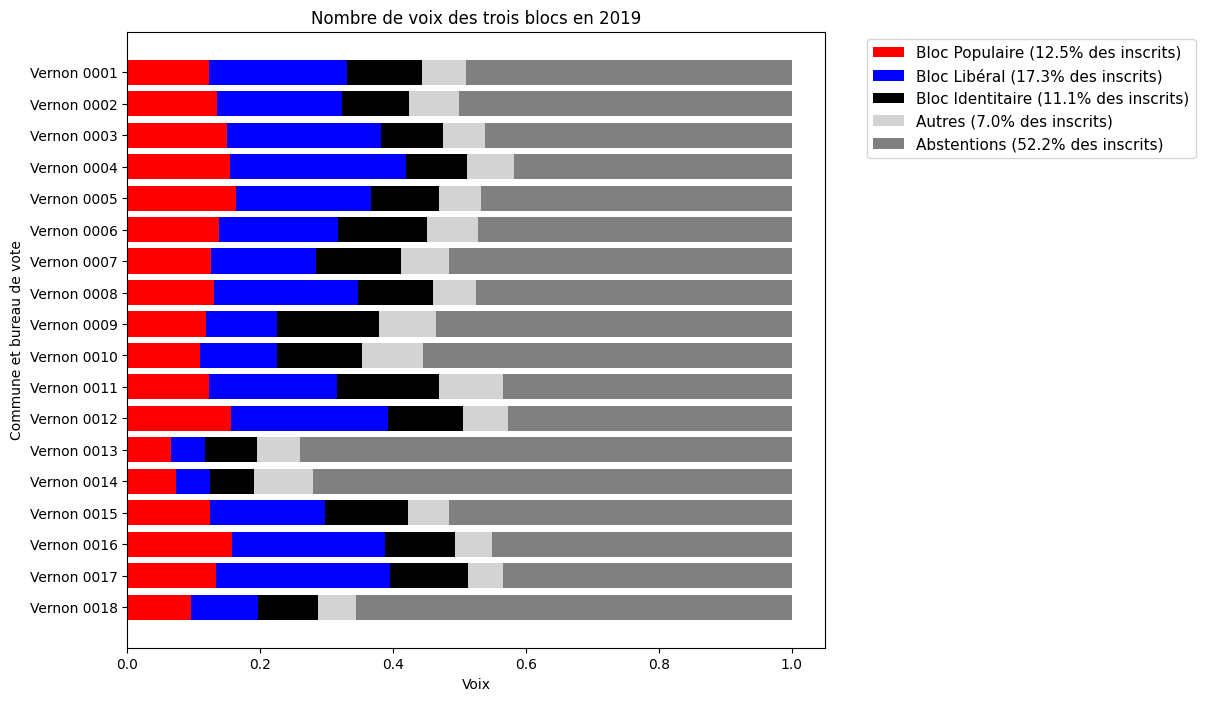

In [438]:
#dataframe des listes ayant obtenu des sièges en 2019
manon_2019 = df_2019[df_2019['Nom Tête de Liste'] == 'AUBRY Manon']
bardella_2019 = df_2019[df_2019['Nom Tête de Liste'] == 'BARDELLA Jordan']
macron_2019 = df_2019[df_2019['Nom Tête de Liste'] == 'LOISEAU Nathalie']
glucks_2019 =  df_2019[df_2019['Nom Tête de Liste'] == 'GLUCKSMANN Raphaël']
ecolo_2019 = df_2019[df_2019['Nom Tête de Liste'] == 'JADOT Yannick']
lr_2019 = df_2019[df_2019['Nom Tête de Liste'] == 'BELLAMY François-Xavier']

# autres dataframe de listes n'ayant pas obtenu de députés,
# utiles pour la lecture en blocs et pour les rapports de force...
coco_2019 = df_2019[df_2019['Nom Tête de Liste'] == 'BROSSAT Ian']
udi_2019 = df_2019[df_2019['Nom Tête de Liste'] == 'LAGARDE Jean-Christophe']
patriotes_2019 = df_2019[df_2019['Nom Tête de Liste'] == 'PHILIPPOT Florian']
nda_2019 = df_2019[df_2019['Nom Tête de Liste'] == 'DUPONT-AIGNAN Nicolas']

# df de la lecture en blocs: 
# ug (union de la gauche donne bloc populaire), 
# udc (union droite-centre, donne bloc liberal), 
# udd (union des droites, donne bloc identitaire)
# pour les européennes cette vision est limitée puisque les députés vont siéger dans des groupes différents
ug_2019 = df_2019[(df_2019['Nom Tête de Liste'] == 'AUBRY Manon') 
                         | (df_2019['Nom Tête de Liste'] == 'GLUCKSMANN Raphaël')
                         | (df_2019['Nom Tête de Liste'] == 'JADOT Yannick')
                         | (df_2019['Nom Tête de Liste'] == 'BROSSAT Ian')] # dataset union de la gauche

from dicts import dict_listes_2019
populaire_2019 = ug_2019.groupby('Code du b.vote_df1').agg(dict_listes_2019).reset_index()
udc_2019 = df_2019[(df_2019['Nom Tête de Liste'] == 'LOISEAU Nathalie')
                       | (df_2019['Nom Tête de Liste'] == 'LAGARDE Jean-Christophe')
                       | (df_2019['Nom Tête de Liste'] == 'BELLAMY François-Xavier')
                         ] # dataset union droite et centre
udd_2019 = df_2019[(df_2019['Nom Tête de Liste'] == 'PHILIPPOT Florian')
                       | (df_2019['Nom Tête de Liste'] == 'DUPONT-AIGNAN Nicolas')
                       | (df_2019['Nom Tête de Liste'] == 'BARDELLA Jordan')
                        ] # dataset union des droites

liberal_2019 = udc_2019.groupby('Code du b.vote_df1').agg(dict_listes_2019).reset_index()
identitaire_2019 = udd_2019.groupby('Code du b.vote_df1').agg(dict_listes_2019).reset_index()
identitaire_2019

import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
#import geopandas as gpd

df_p19 = pd.DataFrame(populaire_2019)
df_l19 = pd.DataFrame(liberal_2019)
df_i19 = pd.DataFrame(identitaire_2019)

# merge des dataframe pour la représentation en blocs
resultats_Vernon_2019_tmp = pd.merge(
    df_p19, df_l19,
    on=["Code du b.vote_df1", "Libellé de la commune", "Inscrits", "Abstentions", "Nuls", "Exprimés"],
    suffixes=['_BlocPopulaire', '_BlocLiberal']
)
resultats_Vernon_2019 = pd.merge(
    resultats_Vernon_2019_tmp,df_i19,
    on=["Code du b.vote_df1", "Libellé de la commune", "Inscrits", "Abstentions", "Nuls", "Exprimés"])
resultats_Vernon_2019.rename(columns={"Voix": "Voix_BlocIdentitaire"}, inplace=True)


# Créer un graphique à barres empilées
# Préparer les données pour le graphique
labels = resultats_Vernon_2019["Libellé de la commune"] + " " + resultats_Vernon_2019["Code du b.vote_df1"]
inscr_2019 = resultats_Vernon_2019["Inscrits"] 
votes_p19 = resultats_Vernon_2019["Voix_BlocPopulaire"] / inscr_2019
votes_l19 = resultats_Vernon_2019["Voix_BlocLiberal"]  / inscr_2019
votes_i19 = resultats_Vernon_2019["Voix_BlocIdentitaire"]/  inscr_2019
abs_2019 = resultats_Vernon_2019["Abstentions"]  / inscr_2019
bloc_pop19 = "{:3.1f}".format(100*resultats_Vernon_2019["Voix_BlocPopulaire"].sum()/inscr_2019.sum())
bloc_lib19 = "{:3.1f}".format(100*resultats_Vernon_2019["Voix_BlocLiberal"].sum()/inscr_2019.sum())
bloc_id19 = "{:3.1f}".format(100*resultats_Vernon_2019["Voix_BlocIdentitaire"].sum()/inscr_2019.sum())
reste_2019 = ( 1 - abs_2019 - votes_i19 - votes_l19 - votes_p19 )  #/resultats_Vernon_2019["Exprimés"]
bloc_reste_2019 =  "{:3.1f}".format(100*(resultats_Vernon_2019['Inscrits'].sum() - resultats_Vernon_2019["Abstentions"].sum() - resultats_Vernon_2019["Voix_BlocPopulaire"].sum() - resultats_Vernon_2019["Voix_BlocLiberal"].sum() - resultats_Vernon_2019["Voix_BlocIdentitaire"].sum() ) / resultats_Vernon_2019["Inscrits"].sum())
abst_2019 = "{:3.1f}".format(100*resultats_Vernon_2019["Abstentions"].sum()/inscr_2019.sum())
x = np.arange(len(labels))  # Positions des labels sur l'axe x
# Créer le graphique en barres empilées
fig, ax = plt.subplots(figsize=(9, 8))
bar1 = ax.barh(x, votes_p19, label='Bloc Populaire (' + bloc_pop19 +'% des inscrits)' , color='red')
bar2 = ax.barh(x, votes_l19, left=votes_p19, label='Bloc Libéral (' + bloc_lib19 +'% des inscrits)', color='blue')
bar3 = ax.barh(x, votes_i19, left=votes_l19+votes_p19, label='Bloc Identitaire (' + bloc_id19 +'% des inscrits)',color='black')
bar4 = ax.barh(x, reste_2019, left=votes_i19+votes_l19+votes_p19, label='Autres (' + bloc_reste_2019 +'% des inscrits)',color='lightgrey')
bar5 = ax.barh(x, abs_2019, left=reste_2019+votes_i19+votes_l19+votes_p19, label='Abstentions (' + abst_2019 +'% des inscrits)',color='grey')

# Ajouter les labels et le titre
ax.set_ylabel('Commune et bureau de vote')
ax.set_xlabel('Voix')
ax.set_title('Nombre de voix des trois blocs en 2019')
ax.set_yticks(x,labels=labels) #( resultats_Vernon_2019["Code du b.vote_df1"],  ha='right')
ax.invert_yaxis()
ax.legend(bbox_to_anchor=(1.05, 1), fontsize=11)
#plt.legend(bbox_to_anchor=(1.05, 1), fontsize=11)

# Afficher le graphique
#plt.tight_layout()
#plt.show()
fig.show()


Meme manoeuvre avec plotly, plus joli...

In [439]:
import plotly.graph_objects as go

inscr_2019 = resultats_Vernon_2019["Inscrits"] 
votes_p19 = resultats_Vernon_2019["Voix_BlocPopulaire"] / inscr_2019
votes_l19 = resultats_Vernon_2019["Voix_BlocLiberal"]  / inscr_2019
votes_i19 = resultats_Vernon_2019["Voix_BlocIdentitaire"]/  inscr_2019
abs_2019 = resultats_Vernon_2019["Abstentions"]  / inscr_2019

fig = go.Figure()
fig.add_trace(go.Bar( #bloc pop
    y=populaire_2019["Code du b.vote_df1"],
    x=100*votes_p19,
    name='Bloc Populaire (' + bloc_pop19 +'% des inscrits)',
    orientation='h',
    marker=dict(
        color='crimson',#'rgba(206, 14, 31, 0.9)', 'rgba(128, 1, 1, 1.0)'
        line=dict(color='darkred', width=3)
    )
))
fig.add_trace(go.Bar( # bloc lib
    y=populaire_2019["Code du b.vote_df1"],
    x=100*votes_l19,
    name='Bloc Libéral (' + bloc_lib19 +'% des inscrits)',
    orientation='h',
    marker=dict(
        color="mediumpurple",#'rgba(145, 1, 229, 0.6)',  'rgba(158, 20, 200, 1.0)'
        line=dict(color='purple', width=3)
    )
))
fig.add_trace(go.Bar( # bloc lib
    y=populaire_2019["Code du b.vote_df1"],
    x=100*votes_i19,
    name='Bloc Identitaire (' + bloc_id19 +'% des inscrits)',
    orientation='h',
    marker=dict(
        color='navy',#'rgba(10, 1, 150, 0.8)','rgba(4, 2, 136, 1.0)'
        line=dict(color='midnightblue', width=3)
    )
))
fig.add_trace(go.Bar( # bloc lib
    y=populaire_2019["Code du b.vote_df1"],
    x=100*reste_2019,
    name='Autres (' + bloc_reste_2019 +'% des inscrits)',
    orientation='h',
    marker=dict(
        color='rgba(204, 204, 204, 0.9)',
        line=dict(color='rgba(58, 71, 80, 0.9)', width=3)
    )
))
fig.add_trace(go.Bar( # bloc lib
    y=populaire_2019["Code du b.vote_df1"],
    x=100*abs_2019,
    name='Abstentions (' + abst_2019 +'% des inscrits)',
    orientation='h',
    marker=dict(
        color='rgba(84, 84, 84, 0.9)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))

fig.update_yaxes(
    autorange='reversed'
)
xaxis_t = "% du nombre d'inscrits"
yaxis_t = "Bureaux de vote de "+str(resultats_Vernon_2019["Libellé de la commune"][0])
fig.update_layout(
    barmode='stack',
    yaxis_title=dict(text=yaxis_t,font=dict(size=20)),
    xaxis_title=dict(text=xaxis_t,font=dict(size=20)),
    title_font_family="Arial",
    title_font_size=26,
    title=dict(text="Électorats des trois blocs (et de l'abstention) en 2019", font=dict(size=30), automargin=False,y=0.88,x=0.43,
        xanchor= 'center',
        yanchor= 'top'),
    legend_title=dict(text="Légende",font=dict(size=18))
    )
#fig = px.bar(populaire_2019,populaire_2019['Voix'], populaire_2019['Code du b.vote_df1'],  title='Résultats par commune',orientation='h')
#fig.show()
#resultats_Vernon_2019["Libellé de la commune"][0]


3. Visualisation en listes 2019

In [447]:
#construction des dataframes
df_m19 = pd.DataFrame(manon_2019)
df_g19 = pd.DataFrame(glucks_2019)
df_e19 = pd.DataFrame(ecolo_2019)
df_em19= pd.DataFrame(macron_2019)
df_lr19= pd.DataFrame(lr_2019)
df_j19 = pd.DataFrame(bardella_2019)

mask_autres = df_2019['Nom Tête de Liste'].isin(
    ['AUBRY Manon',
    'LOISEAU Nathalie', 
    'BARDELLA Jordan',
    'GLUCKSMANN Raphaël',
    'JADOT Yannick',
    'BELLAMY François-Xavier'])
df_autres2019 = df_2019[~mask_autres].groupby('Code du b.vote_df1').agg(dict_part).reset_index()
#df_autres2019.groupby('Code du b.vote_df1').agg(dict_part).reset_index()
#print(df_autres2019['Inscrits'].unique().sum() , df_autres2019['Voix'].sum(),grouped_2019['Voix'].sum())




0      11.0
1      39.0
2     -37.0
3     -92.0
4     -14.0
5     -10.0
6      76.0
7     -12.0
8      92.0
9      81.0
10    -82.0
11   -110.0
12    600.0
13    344.0
14     66.0
15    -65.0
16    -84.0
17    302.0
dtype: float64

In [442]:

manon_2019_resultats_inscrits = "{:3.1f}".format(100*manon_2019['Voix'].sum() / manon_2019['Inscrits'].sum())
glucks_2019_resultats_inscrits = "{:3.1f}".format(100*glucks_2019['Voix'].sum() / glucks_2019['Inscrits'].sum())
bardella_2019_resultats_inscrits = "{:3.1f}".format(100*bardella_2019['Voix'].sum() / bardella_2019['Inscrits'].sum())
macron_2019_resultats_inscrits = "{:3.1f}".format(100*macron_2019['Voix'].sum() / macron_2019['Inscrits'].sum())
ecolo_2019_resultats_inscrits = "{:3.1f}".format(100*ecolo_2019['Voix'].sum() / ecolo_2019['Inscrits'].sum())
lr_2019_resultats_inscrits = "{:3.1f}".format(100*lr_2019['Voix'].sum() / lr_2019['Inscrits'].sum())

autres_2019_resultats_inscrits = "{:3.1f}".format(100*df_autres2019['Voix'].sum() / df_autres2019['Inscrits'].unique().sum())

fig = go.Figure()
fig.add_trace(go.Bar(
    y=manon_2019["Code du b.vote_df1"],
    x=100*(manon_2019['Voix']/manon_2019['Inscrits']),
    name='AUBRY Manon (' + manon_2019_resultats_inscrits +'% des inscrits)',
    orientation='h',
    marker=dict(
        color='crimson',#'rgba(206, 14, 31, 0.9)', 'rgba(128, 1, 1, 1.0)'
        line=dict(color='darkred', width=3)
    )
))
fig.add_trace(go.Bar( 
    y=glucks_2019["Code du b.vote_df1"],
    x=100*(glucks_2019['Voix']/glucks_2019['Inscrits']),
    name='GLUCKSMANN Raphaël (' + glucks_2019_resultats_inscrits +'% des inscrits)',
    orientation='h',
    marker=dict(
        color='lightpink',#'
        line=dict(color='deeppink', width=3)
    )
))
fig.add_trace(go.Bar( 
    y=ecolo_2019["Code du b.vote_df1"],
    x=100*(ecolo_2019['Voix']/ecolo_2019['Inscrits']),
    name='JADOT Yannick (' + ecolo_2019_resultats_inscrits +'% des inscrits)',
    orientation='h',
    marker=dict(
        color='lightgreen',#'
        line=dict(color='green', width=3)
    )
))
fig.add_trace(go.Bar( 
    y=macron_2019["Code du b.vote_df1"],
    x=100*(macron_2019['Voix']/macron_2019['Inscrits']),
    name='LOISEAU Nathalie (' + macron_2019_resultats_inscrits +'% des inscrits)',
    orientation='h',
    marker=dict(
        color='gold',#'
        line=dict(color='yellow', width=3)
    )
))
fig.add_trace(go.Bar( 
    y=lr_2019["Code du b.vote_df1"],
    x=100*(lr_2019['Voix']/lr_2019['Inscrits']),
    name='BELLAMY François-Xavier (' + lr_2019_resultats_inscrits +'% des inscrits)',
    orientation='h',
    marker=dict(
        color='lightskyblue',#'
        line=dict(color='dodgerblue', width=3)
    )
))
fig.add_trace(go.Bar( # 
    y=bardella_2019["Code du b.vote_df1"],
    x=100*(bardella_2019['Voix']/bardella_2019['Inscrits']),
    name='BARDELLA Jordan (' + bardella_2019_resultats_inscrits +'% des inscrits)',
    orientation='h',
    marker=dict(
        color='navy',#'rgba(10, 1, 150, 0.8)','rgba(4, 2, 136, 1.0)'
        line=dict(color='midnightblue', width=3)
    )
))
fig.add_trace(go.Bar( # bloc lib
    y=populaire_2019["Code du b.vote_df1"],
    x=100*df_autres2019['Voix'],
    name='Autres (' + bloc_reste_2019 +'% des inscrits)',
    orientation='h',
    marker=dict(
        color='rgba(204, 204, 204, 0.9)',
        line=dict(color='rgba(58, 71, 80, 0.9)', width=3)
    )
))
fig.add_trace(go.Bar( # bloc lib
    y=populaire_2019["Code du b.vote_df1"],
    x=100*abs_2019,
    name='Abstentions (' + abst_2019 +'% des inscrits)',
    orientation='h',
    marker=dict(
        color='rgba(84, 84, 84, 0.9)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))

fig.update_yaxes(
    autorange='reversed'
)
xaxis_t = "% du nombre d'inscrits"
yaxis_t = "Bureaux de vote de "+str(resultats_Vernon_2019["Libellé de la commune"][0])
fig.update_layout(
    barmode='stack',
    yaxis_title=dict(text=yaxis_t,font=dict(size=20)),
    xaxis_title=dict(text=xaxis_t,font=dict(size=20)),
    title_font_family="Arial",
    title_font_size=26,
    title=dict(text="Élections européennes 2019 : résultats totaux", font=dict(size=30), automargin=False,y=0.88,x=0.43,
        xanchor= 'center',
        yanchor= 'top'),
    legend_title=dict(text="Légende",font=dict(size=18))
    )


Même manoeuvre avec 2024 ! On se déporte progressivement de la vue en blocs, qui ne s'applique pas vraiment aux européennes.

In [301]:
manon_2024 = df_2024_e[df_2024_e['Nuance'] == 'LFI']
bardella_2024 = df_2024_e[df_2024_e['Nuance'] == 'LRN']
macron_2024 = df_2024_e[df_2024_e['Nuance'] == 'LENS']
glucks_2024 = df_2024_e[df_2024_e['Nuance'] == 'LUG']
z_2024 = df_2024_e[df_2024_e['Nuance'] == 'LREC']

ug_2024 = df_2024_e[(df_2024_e['Libellé Abrégé Liste'] == 'LFI - UP') 
                         | (df_2024_e['Libellé Abrégé Liste'] == 'REVEIL EUR')
                         | (df_2024_e['Libellé Abrégé Liste'] == 'EUROPE ÉCOLOGIE')
                         | (df_2024_e['Libellé Abrégé Liste'] == 'GAUCHE UNIE')] # dataset union de la gauche



array(['HUMANITE SOUVERAINE',
       'POUR UNE DEMOCRATIE REELLE : DECIDONS NOUS-MEMES !',
       'LA FRANCE FIERE, MENEE PAR MARION MARECHAL ET SOUTENUE PAR ÉRIC ZEMMOUR',
       'LFI - UP', 'La FRANCE REVIENT', 'EUROPE ÉCOLOGIE',
       'FREE PALESTINE', 'PARTI ANIMALISTE',
       'PARTI REVOLUTIONNAIRE COMMUNISTES', 'PARTI PIRATE',
       "BESOIN D'EUROPE", 'PACE', 'ÉQUINOXE', 'ECOLOGIE POSITIVE',
       'LISTE ASSELINEAU-FREXIT', 'PAIX ET DECROISSANCE',
       'POUR UNE AUTRE EUROPE',
       'LA DROITE POUR FAIRE ENTENDRE LA VOIX DE LA FRANCE EN EUROPE',
       'LUTTE OUVRIERE', "CHANGER L'EUROPE", 'NLP',
       'URGENCE REVOLUTION !', 'PPL', "L'EUROPE CA SUFFIT !",
       'PRENONS-NOUS EN MAIN', 'FORTERESSE EUROPE', 'REVEIL EUR',
       "NON À L'UE ET À L'OTAN, COMMUNISTES POUR LA PAIX ET LE PROGRÈS SOCIAL",
       'AR', 'FRANCE LIBRE', 'EUROPE TERRITOIRES ÉCOLOGIE',
       'LA RUCHE CITOYENNE', 'GAUCHE UNIE', 'DEFENDRE LES ENFANTS', 'EAC',
       'DEMOCRATIE REPRESENTATIVE', 'ESP